In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.0. Análise de candidatos a deputados em 2014

In [143]:
dataframe = pd.read_csv('candidatos_deputados_2014_final.csv', encoding='latin1')


### 1.1. Informações gerais do dataset

In [3]:
dataframe.head()

,SIGLA_UF,CODIGO_CARGO,DESCRICAO_CARGO,NOME_CANDIDATO,SEQUENCIAL_CANDIDATO,COD_SITUACAO_CANDIDATURA,DES_SITUACAO_CANDIDATURA,NUMERO_PARTIDO,CODIGO_LEGENDA,CODIGO_OCUPACAO,...,TP_RECEITA_APLICACAO,TP_RECEITA_EVENTO,TP_RECEITA_FISICA,TP_RECEITA_INTERNET,TP_RECEITA_JURIDICA,TP_RECEITA_NAO_IDENTIFICADA,TP_RECEITA_OUTRO,TP_RECEITA_PARTIDO,TP_RECEITA_PROPRIO,VALOR_RECEITA
0,AC,7,DEPUTADO ESTADUAL,BENEDITO SILVA BARBOSA,10000000504,2,DEFERIDO,23,10000000034,266,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,690.5,1500.0,2190.50
1,AC,7,DEPUTADO ESTADUAL,MARIA APARECIDA ALVES DE SOUZA,10000000055,2,DEFERIDO,12,10000000021,254,...,0.0,0.0,0.0,0.0,0.0,0.0,821.88,0.0,0.0,821.88
2,AC,7,DEPUTADO ESTADUAL,ASTÉRIO DE PAULA MOREIRA FILHO,10000000206,2,DEFERIDO,51,10000000028,277,...,0.0,0.0,18100.0,0.0,0.0,0.0,36505.00,17500.0,34500.0,106605.00
3,AC,7,DEPUTADO ESTADUAL,JOSÉ MASTRANGELO FILHO,10000000514,2,DEFERIDO,23,10000000034,171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,6500.0,6500.00
4,AC,7,DEPUTADO ESTADUAL,CARLOS ANDRÉ MENEZES DE OLIVEIRA,10000000519,2,DEFERIDO,23,10000000034,244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataframe.describe()

,CODIGO_CARGO,SEQUENCIAL_CANDIDATO,COD_SITUACAO_CANDIDATURA,NUMERO_PARTIDO,CODIGO_LEGENDA,CODIGO_OCUPACAO,IDADE_DATA_ELEICAO,CODIGO_SEXO,COD_GRAU_INSTRUCAO,CODIGO_ESTADO_CIVIL,...,TP_RECEITA_APLICACAO,TP_RECEITA_EVENTO,TP_RECEITA_FISICA,TP_RECEITA_INTERNET,TP_RECEITA_JURIDICA,TP_RECEITA_NAO_IDENTIFICADA,TP_RECEITA_OUTRO,TP_RECEITA_PARTIDO,TP_RECEITA_PROPRIO,VALOR_RECEITA
count,21124.000000,2.112400e+04,21124.000000,21124.000000,2.112400e+04,21124.000000,21124.000000,21124.000000,21124.000000,21124.000000,...,17728.000000,17728.000000,1.772800e+04,17728.000000,1.772800e+04,17728.000000,1.772800e+04,1.772800e+04,1.772800e+04,1.772800e+04
mean,6.767563,1.505065e+11,2.015243,33.772392,1.505065e+11,415.259421,46.751278,2.583412,6.704743,3.131509,...,7.036320,0.125790,2.351419e+04,48.399494,3.612112e+04,14.908870,1.821933e+04,3.999410e+04,1.830199e+04,1.362212e+05
std,0.518864,7.425464e+10,0.461719,19.472368,7.425464e+10,318.335785,11.222254,0.909117,1.489878,2.304216,...,197.468051,15.119948,7.594180e+04,2293.766378,1.710402e+05,807.473966,7.203672e+04,2.080572e+05,9.764954e+04,4.106590e+05
min,6.000000,1.000000e+10,2.000000,10.000000,1.000000e+10,101.000000,20.000000,2.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
25%,6.000000,9.000000e+10,2.000000,16.000000,9.000000e+10,171.000000,39.000000,2.000000,6.000000,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.802762e+03
50%,7.000000,1.600000e+11,2.000000,31.000000,1.600000e+11,277.000000,47.000000,2.000000,7.000000,3.000000,...,0.000000,0.000000,1.448000e+03,0.000000,0.000000e+00,0.000000,1.007755e+03,0.000000e+00,1.000000e+02,1.074726e+04
75%,7.000000,2.100000e+11,2.000000,45.000000,2.100000e+11,581.000000,54.000000,4.000000,8.000000,3.000000,...,0.000000,0.000000,1.099110e+04,0.000000,1.435500e+03,0.000000,7.775750e+03,4.000000e+03,5.931560e+03,6.739185e+04
max,8.000000,2.700000e+11,16.000000,90.000000,2.700000e+11,999.000000,91.000000,4.000000,8.000000,9.000000,...,12496.320000,2000.000000,1.859112e+06,203300.000000,3.828338e+06,100000.000000,2.174926e+06,5.769682e+06,4.041310e+06,6.832481e+06


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21124 entries, 0 to 21123
Data columns (total 56 columns):
SIGLA_UF                       21124 non-null object
CODIGO_CARGO                   21124 non-null int64
DESCRICAO_CARGO                21124 non-null object
NOME_CANDIDATO                 21124 non-null object
SEQUENCIAL_CANDIDATO           21124 non-null int64
COD_SITUACAO_CANDIDATURA       21124 non-null int64
DES_SITUACAO_CANDIDATURA       21124 non-null object
NUMERO_PARTIDO                 21124 non-null int64
CODIGO_LEGENDA                 21124 non-null int64
CODIGO_OCUPACAO                21124 non-null int64
DESCRICAO_OCUPACAO             21124 non-null object
IDADE_DATA_ELEICAO             21124 non-null int64
CODIGO_SEXO                    21124 non-null int64
DESCRICAO_SEXO                 21124 non-null object
COD_GRAU_INSTRUCAO             21124 non-null int64
DESCRICAO_GRAU_INSTRUCAO       21124 non-null object
CODIGO_ESTADO_CIVIL            21124 non-null int64


### 1.2. Formatação dos dados

In [6]:
dataframe['VALOR_BEM'].fillna(0.0, inplace=True) ## Altera os valores nulos da tabela para 0
dataframe['SETOR_A'].fillna(0.0, inplace=True)
dataframe['SETOR_B'].fillna(0.0, inplace=True)
dataframe['SETOR_C'].fillna(0.0, inplace=True)
dataframe['SETOR_D'].fillna(0.0, inplace=True)
dataframe['SETOR_E'].fillna(0.0, inplace=True)
dataframe['SETOR_F'].fillna(0.0, inplace=True)
dataframe['SETOR_G'].fillna(0.0, inplace=True)
dataframe['SETOR_H'].fillna(0.0, inplace=True)
dataframe['SETOR_I'].fillna(0.0, inplace=True)
dataframe['SETOR_J'].fillna(0.0, inplace=True)
dataframe['SETOR_K'].fillna(0.0, inplace=True)
dataframe['SETOR_L'].fillna(0.0, inplace=True)
dataframe['SETOR_M'].fillna(0.0, inplace=True)
dataframe['SETOR_N'].fillna(0.0, inplace=True)
dataframe['SETOR_O'].fillna(0.0, inplace=True)
dataframe['SETOR_P'].fillna(0.0, inplace=True)
dataframe['SETOR_Q'].fillna(0.0, inplace=True)
dataframe['SETOR_R'].fillna(0.0, inplace=True)
dataframe['SETOR_S'].fillna(0.0, inplace=True)

In [7]:
dataframe['SETOR_NAO_IDENTIFICADO'].fillna(0.0, inplace=True)
dataframe['TP_RECEITA_APLICACAO'].fillna(0.0, inplace=True)
dataframe['TP_RECEITA_EVENTO'].fillna(0.0, inplace=True)
dataframe['TP_RECEITA_FISICA'].fillna(0.0, inplace=True)
dataframe['TP_RECEITA_INTERNET'].fillna(0.0, inplace=True)
dataframe['TP_RECEITA_JURIDICA'].fillna(0.0, inplace=True)   
dataframe['TP_RECEITA_NAO_IDENTIFICADA'].fillna(0.0, inplace=True)
dataframe['TP_RECEITA_OUTRO'].fillna(0.0, inplace=True)
dataframe['TP_RECEITA_PARTIDO'].fillna(0.0, inplace=True)
dataframe['TP_RECEITA_PROPRIO'].fillna(0.0, inplace=True)
dataframe['VALOR_RECEITA'].fillna(0.0, inplace=True)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21124 entries, 0 to 21123
Data columns (total 56 columns):
SIGLA_UF                       21124 non-null object
CODIGO_CARGO                   21124 non-null int64
DESCRICAO_CARGO                21124 non-null object
NOME_CANDIDATO                 21124 non-null object
SEQUENCIAL_CANDIDATO           21124 non-null int64
COD_SITUACAO_CANDIDATURA       21124 non-null int64
DES_SITUACAO_CANDIDATURA       21124 non-null object
NUMERO_PARTIDO                 21124 non-null int64
CODIGO_LEGENDA                 21124 non-null int64
CODIGO_OCUPACAO                21124 non-null int64
DESCRICAO_OCUPACAO             21124 non-null object
IDADE_DATA_ELEICAO             21124 non-null int64
CODIGO_SEXO                    21124 non-null int64
DESCRICAO_SEXO                 21124 non-null object
COD_GRAU_INSTRUCAO             21124 non-null int64
DESCRICAO_GRAU_INSTRUCAO       21124 non-null object
CODIGO_ESTADO_CIVIL            21124 non-null int64


In [9]:
dataframe.duplicated().sum() # verifica se há valores duplicados

0

### 1.3. Análise dos dados - Quantidade de candidatos por Estado

In [10]:
SIGLA_UF = dataframe.groupby('SIGLA_UF')['SIGLA_UF'].count()
SIGLA_UF

SIGLA_UF
AC     553
AL     352
AM     619
AP     435
BA     838
CE     730
DF    1084
ES     609
GO     788
MA     695
MG    1629
MS     489
MT     362
PA     787
PB     398
PE     628
PI     303
PR    1004
RJ    2574
RN     317
RO     447
RR     463
RS     971
SC     519
SE     229
SP    3023
TO     278
Name: SIGLA_UF, dtype: int64

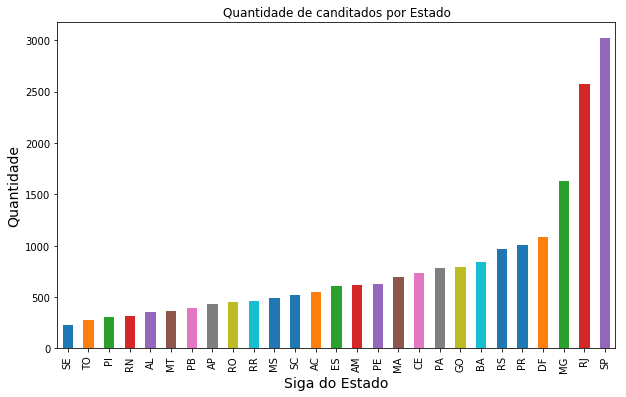

In [11]:
SIGLA_UF.sort_values().plot(kind="bar", figsize=(10,6))
plt.title('Quantidade de canditados por Estado')
plt.ylabel('Quantidade', fontsize=14)
plt.xlabel('Siga do Estado', fontsize=14)
plt.show()

### 1.4. Análise dos dados - Quantidade de candidatos por sexo

> Quantidade de Homens e de Mulheres que foram candidatos

In [12]:
CODIGO_SEXO = dataframe.groupby('CODIGO_SEXO')['CODIGO_SEXO'].count()
CODIGO_SEXO

CODIGO_SEXO
2    14962
4     6162
Name: CODIGO_SEXO, dtype: int64

> Gráfico que relaciona Homens e de Mulheres que foram candidatos

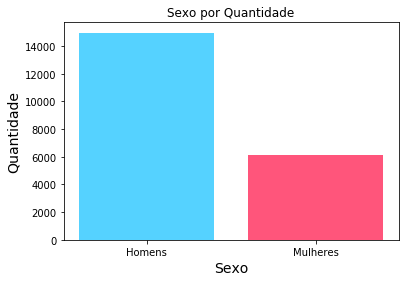

In [13]:
plt.bar([1, 2], CODIGO_SEXO, tick_label = ['Homens', 'Mulheres'], color=['#55D2FF','#FF557B'])
plt.title('Sexo por Quantidade')
plt.ylabel('Quantidade', fontsize=14)
plt.xlabel('Sexo', fontsize=14)
plt.show()

### 1.5. Análise dos dados - Média de idade por sexo

> Média de idade dos candidatos dividido por sexo

In [14]:
CODIGO_SEXO = dataframe.groupby('CODIGO_SEXO')['IDADE_DATA_ELEICAO'].mean()
CODIGO_SEXO

CODIGO_SEXO
2    47.368600
4    45.252353
Name: IDADE_DATA_ELEICAO, dtype: float64

In [15]:
search = pd.crosstab(dataframe['CODIGO_SEXO'],dataframe['IDADE_DATA_ELEICAO'])
search.head(3)

IDADE_DATA_ELEICAO,20,21,22,23,24,25,26,27,28,29,...,79,80,81,82,83,84,85,86,89,91
CODIGO_SEXO,,,,,,,,,,,,,,,,,,,,,
2,5,26,39,58,52,71,89,114,117,145,...,10,8,7,2,6,5,2,2,2,2
4,12,54,57,52,67,69,81,107,89,85,...,3,0,0,1,0,1,0,0,0,0


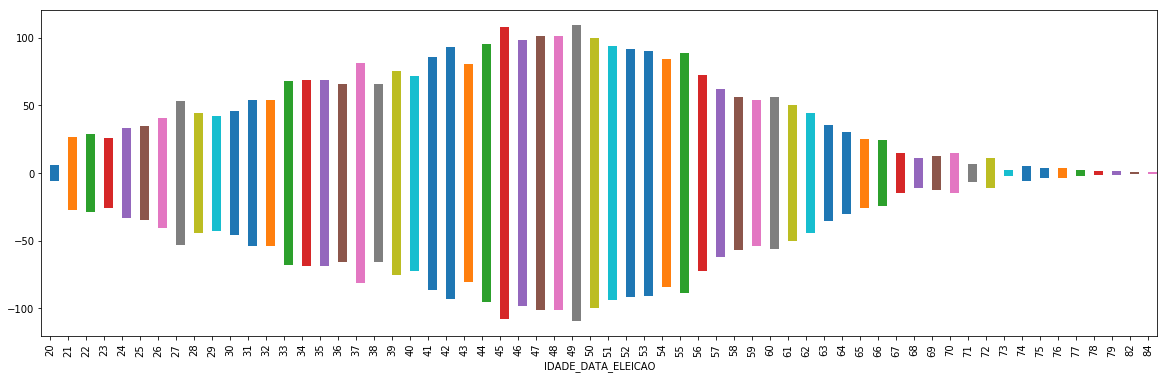

In [16]:
search = dataframe.loc[dataframe['CODIGO_SEXO'] == 4]
IDADE_DATA_ELEICAO = search.groupby('IDADE_DATA_ELEICAO')['IDADE_DATA_ELEICAO'].count()
IDADE_DATA_ELEICAO.plot(kind='bar', figsize=(20,6), orientation='horizontal')
plt.show()

### 1.6. Análise dos dados - Despesa máxima da campanha

In [115]:
print ("Média de despesas total: %f" % dataframe['DESPESA_MAX_CAMPANHA'].mean())
print ("Maior de despesas total: %f" % dataframe['DESPESA_MAX_CAMPANHA'].max())
print("\nDados gerais")
dataframe['DESPESA_MAX_CAMPANHA'].describe()

Média de despesas total: 2759528.593069
Maior de despesas total: 90000000.000000

Dados gerais


count    2.112400e+04
mean     2.759529e+06
std      3.933739e+06
min      0.000000e+00
25%      1.000000e+06
50%      2.000000e+06
75%      4.000000e+06
max      9.000000e+07
Name: DESPESA_MAX_CAMPANHA, dtype: float64

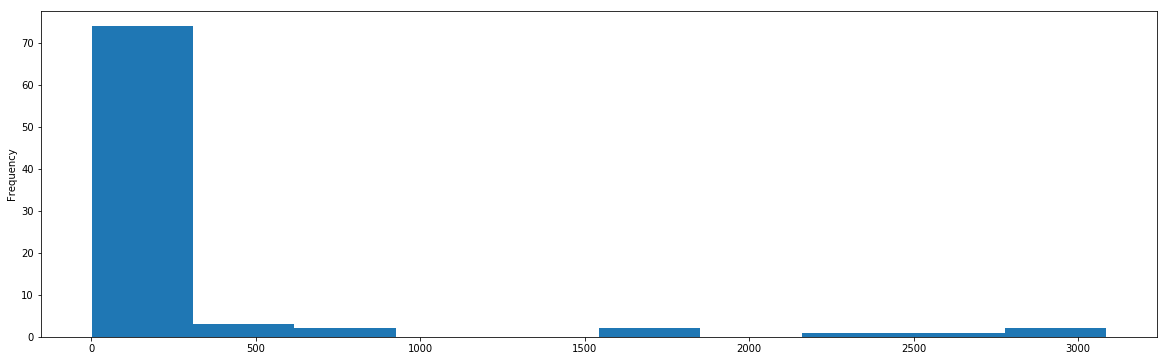

In [18]:
DESPESA_MAX_CAMPANHA = dataframe.groupby('DESPESA_MAX_CAMPANHA')['DESPESA_MAX_CAMPANHA'].count()
DESPESA_MAX_CAMPANHA.plot(kind='hist', figsize=(20,6))
plt.show()

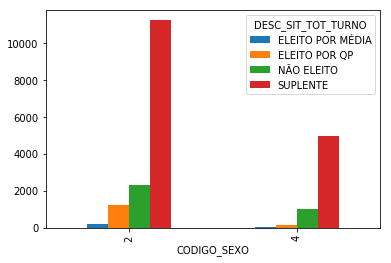

In [95]:
search = pd.crosstab(dataframe['CODIGO_SEXO'],dataframe['DESC_SIT_TOT_TURNO'])
search.plot(kind="bar")

In [99]:
search = pd.crosstab(dataframe['CODIGO_SEXO'], dataframe['DESC_SIT_TOT_TURNO'])
search

DESC_SIT_TOT_TURNO,ELEITO POR MÉDIA,ELEITO POR QP,NÃO ELEITO,SUPLENTE
CODIGO_SEXO,,,,
2,191,1211,2314,11246
4,24,146,1020,4972


In [145]:
search = dataframe.groupby('DESC_SIT_TOT_TURNO')['DESC_SIT_TOT_TURNO'].count()
search

DESC_SIT_TOT_TURNO
ELEITO POR MÉDIA      215
ELEITO POR QP        1357
NÃO ELEITO           3334
SUPLENTE            16218
Name: DESC_SIT_TOT_TURNO, dtype: int64

In [147]:
search = dataframe.groupby('COD_SIT_TOT_TURNO')['COD_SIT_TOT_TURNO'].count()
search # 2 - ELEITO POR QP, 3 - ELEITO POR MÉDIA, 4 - NÃO ELEITO, 5 - SUPLENTE

COD_SIT_TOT_TURNO
2     1357
3      215
4     3334
5    16218
Name: COD_SIT_TOT_TURNO, dtype: int64

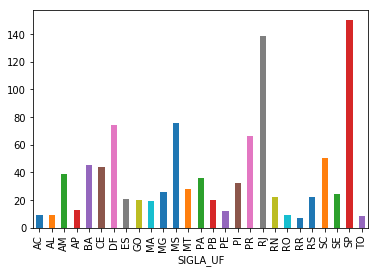

In [169]:
search = dataframe.query('COD_SIT_TOT_TURNO == 4 & CODIGO_SEXO == 4')
filter1 = search.groupby('SIGLA_UF')['SIGLA_UF'].count()
filter1.plot(kind='bar')